### Make OBCs from mode 1 calculated from Brink at the southern boundary

In [29]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.io as sio

In [30]:
def get_Brink(file_fig):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]

    ## (u is cross-shore and v is alongshore in Brink. I'm flipping them back right here)
    p0, v0, u0, w0, r0 = file['p'], file['u'],file['v'], file['wvel'], file['rho']

    #file_rfw = sio.loadmat(file_ratio)
    #R = file_rfw['ratio_for_wave'][0][0]
    #print('ratio for wave', R)
    #print('k (rad/cm) ', k)
    #print('lambda (km) ', (2*np.pi/(k*100E3)))
    #print('omega (rad/s) ', f)
    #print('c (m/s)', (f/(k*100)))
    scale=0.2
    w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    return(u,v,w,r,p,z,k,f,xpl, xxx, zzz)

def plot_Brink(ax2,ax3,ax4,u,v,p,z,xpl,xxx,zzz,minp,maxp,nlev=15):
    landc='#8b7765'
    levels=np.linspace(minp,maxp,nlev)
    p3 = ax4.contourf(xpl, z, p, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                      vmax=maxp, zorder=1)
    ax4.contour(xpl, z, p, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax4.contour(xpl, z, p, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax4.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax4.set_title('p')

    levels=np.linspace(np.nanmin(v),np.nanmax(v),nlev)
    p4 = ax2.contourf(xpl, z, v, levels=levels, cmap=cmo.cm.balance, vmin=-np.nanmax(v),
                      vmax=np.nanmax(v), zorder=1)
    ax2.contour(xpl, z, v, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax2.contour(xpl, z, v, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax2.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax2.set_title('v, cross-shelf')

    levels=np.linspace(np.nanmin(u),np.nanmax(u),nlev)
    p4 = ax3.contourf(xpl, z, u, levels=levels, cmap=cmo.cm.balance, vmin=np.nanmin(u),
                      vmax=-np.nanmin(u), zorder=1)
    ax3.contour(xpl, z, u, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax3.contour(xpl, z, u, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax3.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax3.set_title('u, along-shelf')

def plot_surface(ax0,ax1,v,p,xpl):
    ax0.plot(xpl,p,'-', color='navy', label='surface pressure')
    ax1.plot(xpl,v,'-', color='navy', label='surface cross-shore vel.')
    ax0.axhline(0, color='0.5')
    ax1.axhline(0, color='0.5')
    ax0.set_ylabel('P')
    ax1.set_ylabel('v')
    ax0.legend()
    ax1.legend()
    ax1.set_xlabel('Cross-shelf distance / km')


In [31]:
file = sio.loadmat('dataSVB297mode1.mat')

In [50]:
file = sio.loadmat('dataSVB297mode1.mat')
zgr, xgr = file['zgr'], file['xgr']
k, f = file['wavenumber'][0][0], file['frequency'][0][0]

## (u is cross-shore and v is alongshore in Brink. I'm flipping them back right here)
p0, v0, u0, w0, r0 = file['p'], file['u'],file['v'], file['wvel'], file['rho']

#file_rfw = sio.loadmat(file_ratio)
#R = file_rfw['ratio_for_wave'][0][0]
#print('ratio for wave', R)
#print('k (rad/cm) ', k)
#print('lambda (km) ', (2*np.pi/(k*100E3)))
#print('omega (rad/s) ', f)
#print('c (m/s)', (f/(k*100)))
scale=0.2
w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
v = np.real(v0) * 0.01 * scale # cms-1 to ms-1 and normalization 
r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization

ValueError: Contour levels must be increasing

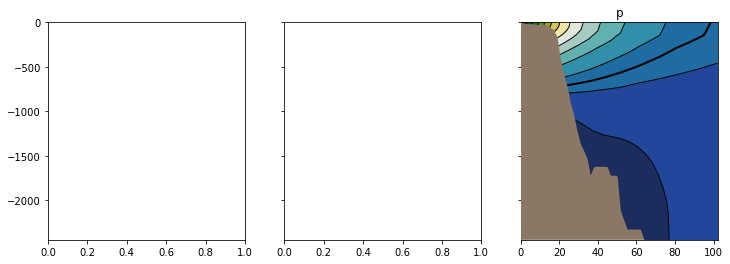

In [51]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
minp = np.nanmin(p)
maxp = np.nanmax(p)
nlev = 15

landc='#8b7765'
levels=np.linspace(minp, maxp, nlev)
p3 = ax4.contourf(xgr, zgr, p, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                  vmax=maxp, zorder=1)
ax4.contour(xgr, zgr, p, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
ax4.contour(xgr, zgr, p, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
ax4.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
ax4.set_title('p')


levels = np.linspace(np.nanmin(v),np.nanmax(v),nlev)
p4 = ax2.contourf(xgr, zgr, v, levels=levels, cmap=cmo.cm.balance, vmin=-np.nanmax(v),
                  vmax=np.nanmax(v), zorder=1)
ax2.contour(xgr, z, v, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
ax2.contour(xgr, z, v, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
ax2.set_title('v, cross-shelf')

levels=np.linspace(np.nanmin(u),np.nanmax(u),nlev)
p4 = ax3.contourf(xgr, zgr, u, levels=levels, cmap=cmo.cm.balance, vmin=np.nanmin(u),
                  vmax=-np.nanmin(u), zorder=1)
ax3.contour(xgr, zgr, u, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
ax3.contour(xgr, zgr, u, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
ax3.set_title('u, along-shelf')


ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')


In [48]:
levels

array([0.-3.41187378e-12j, 0.+3.33728367e-12j, 0.+1.00864411e-11j,
       0.+1.68355986e-11j, 0.+2.35847560e-11j, 0.+3.03339135e-11j,
       0.+3.70830709e-11j, 0.+4.38322283e-11j, 0.+5.05813858e-11j,
       0.+5.73305432e-11j, 0.+6.40797007e-11j, 0.+7.08288581e-11j,
       0.+7.75780156e-11j, 0.+8.43271730e-11j, 0.+9.10763305e-11j])

In [42]:
np.shape(file['xgr'][0,:])

(18,)

In [23]:
np.shape(p)

(198, 18)

In [24]:
file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Nov 17 10:58:52 2023',
 '__version__': '1.0',
 '__globals__': [],
 'rho': array([[-0.00000000e+00, -1.67511500e-16, -2.47597444e-16, ...,
          3.10008508e-15,  3.49838900e-15,  3.89933919e-15],
        [-1.28489531e-14, -1.17358055e-14, -1.06535283e-14, ...,
          1.98477768e-15,  2.91177244e-15,  3.83781686e-15],
        [-2.26068224e-14, -2.09359852e-14, -1.92838273e-14, ...,
          8.14364332e-16,  2.29653458e-15,  3.77672865e-15],
        ...,
        [-0.00000000e+00, -7.16765505e-16, -2.13497113e-15, ...,
         -7.18697520e-14, -5.60573469e-14, -1.39942001e-17],
        [-0.00000000e+00, -7.00372707e-16, -2.08647266e-15, ...,
         -7.09509243e-14, -5.53617975e-14, -1.67090717e-17],
        [-0.00000000e+00, -6.84246718e-16, -2.03876263e-15, ...,
         -7.00464300e-14, -5.46770812e-14, -1.93813692e-17]]),
 'p': array([[ 7.54280925e-05,  7.54280950e-05,  7.54281003e-05, ...,
          7.54